In [179]:
%matplotlib inline

# TUTORIAL - Dowload Satellite-Temperature, and Oxygen Climatology... and use it to force MUSEEL model

This demo requires that you download, from Brightspace, the following files and place them in your working directory:

* model_Mussel_IbarraEtal2014.py

----------------------------

### IMPORTANT!
You will need to import 2 new modules: `basemap` to make maps... and `netCDF4` to hangle .nc files. To do this, open a terminal by going to "anaconda navigator" > click on "Environments" > in the "root" area, click on the "play" symbol > click on "Open Terminal"

In the terminal, write:

```
conda install basemap netcdf4
```

----------------------------

NOw open a browser and open google...

First Google "ERDDAP NOAA" and go to the 1st link. Then, on right top corner, click on "View a List of All #### Datasets"

...or simply go here: https://coastwatch.pfeg.noaa.gov/erddap/info/index.html?page=1&itemsPerPage=1000

---------------------------


Lets start with Satellite SST (Sea Surface Temperature)

Find (Control+F): "SST, POES AVHRR, GAC, Global, Day and Night (Monthly Composite), Lon+/-180"

Click on "data"

...or just go here: https://coastwatch.pfeg.noaa.gov/erddap/griddap/erdAGsstamday_LonPM180.html

-----------------------

Now, start by selecting:

* Time from 2015-08-16 
* Latitude from 38 to 48
* Longiture from -67 to -50
* File type: .nc (NetCDF)

Click "generate url"... 

Below, create a valiable called `url` and paste the url from ERDDAP



In [180]:
# Set up url
url='https://coastwatch.pfeg.noaa.gov/erddap/griddap/erdAGsstamday_LonPM180.nc?sst[(2015-08-16T12:00:00Z):1:(2015-08-16T12:00:00Z)][(0.0):1:(0.0)][(38):1:(48)][(-68):1:(-50)]'

I'll do the next step...

In [181]:
import urllib

# store data in NetCDF file
fileName='sst.nc'
urllib.urlretrieve (url, fileName)

('sst.nc', <httplib.HTTPMessage instance at 0x7f0597768710>)

Above I:

1. Imported a library to download data from urls
2. Created a FileName
3. Downloaded contents of "url" and save it in "FileName"

Once you run the code above... check to see if the file "sst.nc" was created.

--------

Next, lets open the file we created (sst.nc) and load the "variables"


In [182]:
import netCDF4

# open NetCDF data in 
nc = netCDF4.Dataset(file)
ncv = nc.variables

Great!

Now type below `ncv` to see its contents

In [183]:
ncv

OrderedDict([(u'time', <type 'netCDF4._netCDF4.Variable'>
              float64 time(time)
                  _CoordinateAxisType: Time
                  actual_range: [  1.43972640e+09   1.44236160e+09]
                  axis: T
                  fraction_digits: 0
                  ioos_category: Time
                  long_name: Centered Time
                  standard_name: time
                  time_origin: 01-JAN-1970 00:00:00
                  units: seconds since 1970-01-01T00:00:00Z
              unlimited dimensions: 
              current shape = (2,)
              filling off), (u'altitude', <type 'netCDF4._netCDF4.Variable'>
              float64 altitude(altitude)
                  _CoordinateAxisType: Height
                  _CoordinateZisPositive: up
                  actual_range: [ 0.  0.]
                  axis: Z
                  fraction_digits: 0
                  ioos_category: Location
                  long_name: Altitude
                  positive: up
      

Lots of information here. But for now, lets gloss over and do some tests. Answer the questions below:

What type of object is `ncv`?

Hint: use the `type` function to answer this question



In [184]:
type(ncv)

collections.OrderedDict

What "keys" are contained in the ncv dictionary?

Hint: Use method `.keys()`

In [185]:
ncv.keys()


[u'time', u'altitude', u'latitude', u'longitude', u'sst']

Lets extract the latitues and longitudes into two arrays. I'll do it for you.

In [186]:
lon = ncv['longitude'][:]
lat = ncv['latitude'][:]

Check out the contents of `lat`

In [187]:
lat

array([ 38. ,  38.1,  38.2,  38.3,  38.4,  38.5,  38.6,  38.7,  38.8,
        38.9,  39. ,  39.1,  39.2,  39.3,  39.4,  39.5,  39.6,  39.7,
        39.8,  39.9,  40. ,  40.1,  40.2,  40.3,  40.4,  40.5,  40.6,
        40.7,  40.8,  40.9,  41. ,  41.1,  41.2,  41.3,  41.4,  41.5,
        41.6,  41.7,  41.8,  41.9,  42. ,  42.1,  42.2,  42.3,  42.4,
        42.5,  42.6,  42.7,  42.8,  42.9,  43. ,  43.1,  43.2,  43.3,
        43.4,  43.5,  43.6,  43.7,  43.8,  43.9,  44. ,  44.1,  44.2,
        44.3,  44.4,  44.5,  44.6,  44.7,  44.8,  44.9,  45. ,  45.1,
        45.2,  45.3,  45.4,  45.5,  45.6,  45.7,  45.8,  45.9,  46. ,
        46.1,  46.2,  46.3,  46.4,  46.5,  46.6,  46.7,  46.8,  46.9,
        47. ,  47.1,  47.2,  47.3,  47.4,  47.5,  47.6,  47.7,  47.8,
        47.9,  48. ])

Now check out the contents of lon

In [188]:
lon

array([-67. , -66.9, -66.8, -66.7, -66.6, -66.5, -66.4, -66.3, -66.2,
       -66.1, -66. , -65.9, -65.8, -65.7, -65.6, -65.5, -65.4, -65.3,
       -65.2, -65.1, -65. , -64.9, -64.8, -64.7, -64.6, -64.5, -64.4,
       -64.3, -64.2, -64.1, -64. , -63.9, -63.8, -63.7, -63.6, -63.5,
       -63.4, -63.3, -63.2, -63.1, -63. , -62.9, -62.8, -62.7, -62.6,
       -62.5, -62.4, -62.3, -62.2, -62.1, -62. , -61.9, -61.8, -61.7,
       -61.6, -61.5, -61.4, -61.3, -61.2, -61.1, -61. , -60.9, -60.8,
       -60.7, -60.6, -60.5, -60.4, -60.3, -60.2, -60.1, -60. , -59.9,
       -59.8, -59.7, -59.6, -59.5, -59.4, -59.3, -59.2, -59.1, -59. ,
       -58.9, -58.8, -58.7, -58.6, -58.5, -58.4, -58.3, -58.2, -58.1,
       -58. , -57.9, -57.8, -57.7, -57.6, -57.5, -57.4, -57.3, -57.2,
       -57.1, -57. , -56.9, -56.8, -56.7, -56.6, -56.5, -56.4, -56.3,
       -56.2, -56.1, -56. , -55.9, -55.8, -55.7, -55.6, -55.5, -55.4,
       -55.3, -55.2, -55.1, -55. , -54.9, -54.8, -54.7, -54.6, -54.5,
       -54.4, -54.3,

What type of object are `lat` and `lon`?

In [189]:
type(lat)

numpy.ndarray

In [190]:
type(lon)

numpy.ndarray

What is their shape?

Hint: use .shape method

In [191]:
lat.shape

(101,)

In [192]:
lon.shape

(171,)

Step below is tricky to explain. Meshgrid created a two-dimensional matrix (a mesh) of lats and lons 

In [193]:
# Make a grid
lons, lats = np.meshgrid(lon,lat)

Take a look inside `lons`

In [194]:
lons

array([[-67. , -66.9, -66.8, ..., -50.2, -50.1, -50. ],
       [-67. , -66.9, -66.8, ..., -50.2, -50.1, -50. ],
       [-67. , -66.9, -66.8, ..., -50.2, -50.1, -50. ],
       ..., 
       [-67. , -66.9, -66.8, ..., -50.2, -50.1, -50. ],
       [-67. , -66.9, -66.8, ..., -50.2, -50.1, -50. ],
       [-67. , -66.9, -66.8, ..., -50.2, -50.1, -50. ]])

What type of object is `lons`?

In [195]:
type(lons)

numpy.ndarray

What is the shape of `lons`?

hint: use `.shape` method

In [196]:
lons.shape

(101, 171)

What is the shape pf `lats`?

In [197]:
lats.shape

(101, 171)

Perhaps it is best if we plot `lats` and `lons` so you get a better idea of what the are:

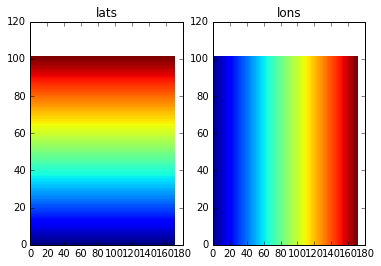

In [198]:
%matplotlib inline

import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.pcolor(lats)
ax1.set_title('lats')
ax2.pcolor(lons)
ax2.set_title('lons')

Next, lets extract Sea Surface Temperature (SST) from our variable `ncv`

In [199]:
# Get SST
sst = ncv['sst'][0,0,:,:]

Take a look inside `sst`

In [200]:
sst

masked_array(data =
 [[28.5 26.924999237060547 28.174999237060547 ..., 26.94285774230957
  26.628572463989258 26.531248092651367]
 [28.299999237060547 -- 27.095001220703125 ..., 27.00714111328125
  26.99285888671875 26.881248474121094]
 [28.0 26.600000381469727 27.389999389648438 ..., 26.640907287597656
  26.742307662963867 26.875]
 ..., 
 [-- -- -- ..., 13.336112022399902 14.160000801086426 13.069999694824219]
 [-- -- -- ..., 13.300000190734863 12.087499618530273 13.208333015441895]
 [-- -- -- ..., 13.09999942779541 13.158333778381348 13.125]],
             mask =
 [[False False False ..., False False False]
 [False  True False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [ True  True  True ..., False False False]
 [ True  True  True ..., False False False]
 [ True  True  True ..., False False False]],
       fill_value = -1e+07)

What type of object is `sst`?

In [201]:
type(sst)

numpy.ma.core.MaskedArray

What is the shape of `sst`?

In [202]:
sst.shape

(101, 171)

Let me put it all together, so that you can see how it looks when all is in one place... run the code below to import sst

In [203]:
year = 2015
month = 8
minlat = 38
maxlat = 48
minlon = -67
maxlon = -50
isub = 0.5

minday = str(year)+'-'+str(month).zfill(2)+'-11T12:00:00Z'
maxday = str(year)+'-'+str(month+1).zfill(2)+'-11T12:00:00Z'

base_url='http://coastwatch.pfeg.noaa.gov/erddap/griddap/erdAGsstamday_LonPM180.nc?'
query='sst[('+minday+'):'+str(isub)+':('+maxday+')][(0.0):'+str(isub)+':(0.0)][('+str(minlat)+'):'+str(isub)+':('+str(maxlat)+')][('+str(minlon)+'):'+str(isub)+':('+str(maxlon)+')]'
url = base_url+query

# store data in NetCDF file
file='satellite_data_tempfile.nc'
urllib.urlretrieve (url, file)

# open NetCDF data in 
nc = netCDF4.Dataset(file)
ncv = nc.variables

lon = ncv['longitude'][:]
lat = ncv['latitude'][:]
lons, lats = np.meshgrid(lon,lat)
sst = ncv['sst'][0,0,:,:]

# Mapping

Lets make a map!!!!

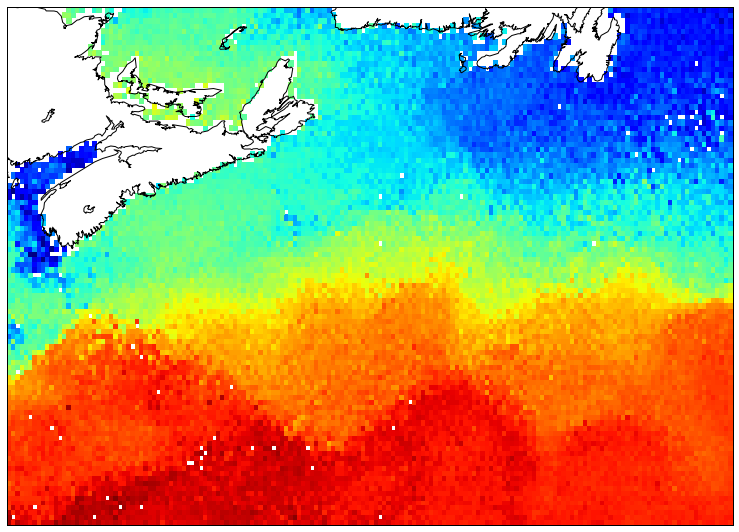

In [204]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Create map (Miller Projection)
m = Basemap(projection='mill', llcrnrlat=minlat,urcrnrlat=maxlat,llcrnrlon=minlon, urcrnrlon=maxlon,resolution='i')
fig1 = plt.figure(figsize=(13,13))
cs = m.pcolormesh(lons,lats,sst,cmap=plt.cm.jet,latlon=True)
m.drawcoastlines()
m.drawmapboundary()

See how easy is to change projection and make another map

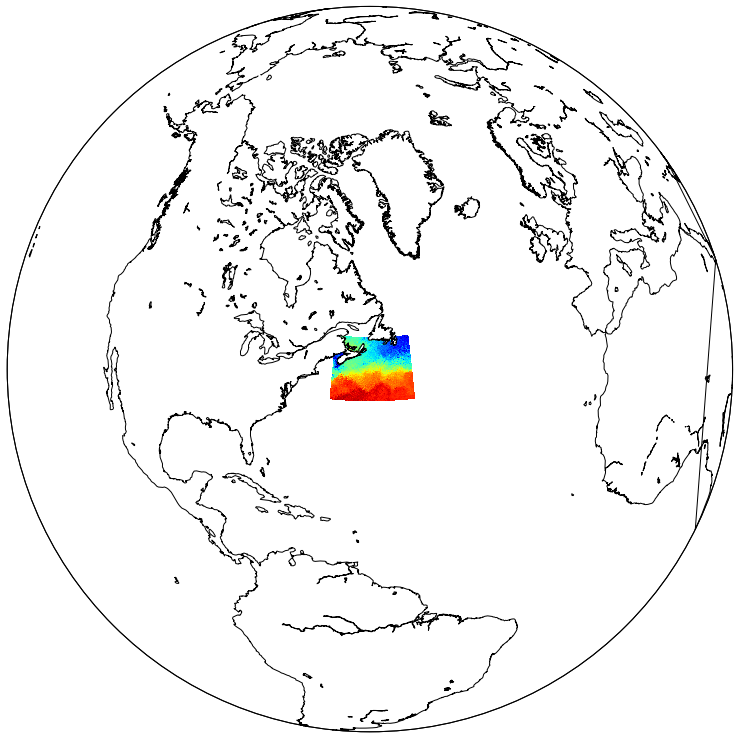

In [205]:
# Create map (Othogonal Projection)
m = Basemap(projection='ortho', lat_0=(maxlat+minlat)/2,lon_0=(maxlon+minlon)/2,resolution='l')
fig1 = plt.figure(figsize=(13,13))
cs = m.pcolormesh(lons,lats,sst,cmap=plt.cm.jet,latlon=True)
m.drawcoastlines()
m.drawmapboundary()

Lets do a map using "kav7" projection

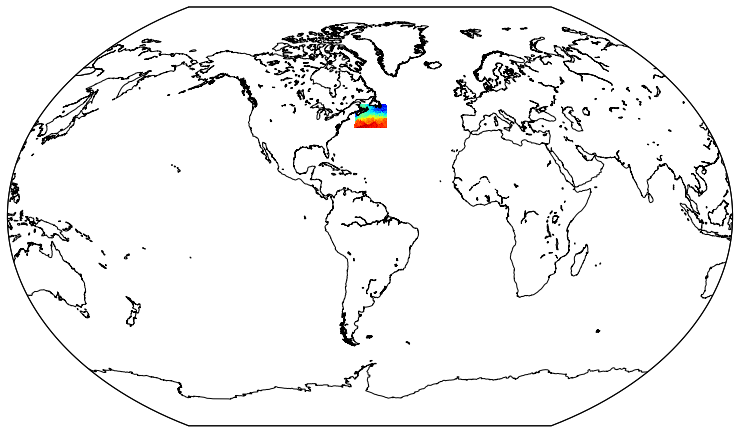

In [206]:
# Create map (kav7 Projection)
m = Basemap(projection='kav7', lon_0=(maxlon+minlon)/2,resolution='l')
fig1 = plt.figure(figsize=(13,13))
cs = m.pcolormesh(lons,lats,sst,cmap=plt.cm.jet,latlon=True)
m.drawcoastlines()
m.drawmapboundary()

One more using "Lamber Comformal Conic Projection". Here I added some extra labels and colorbar

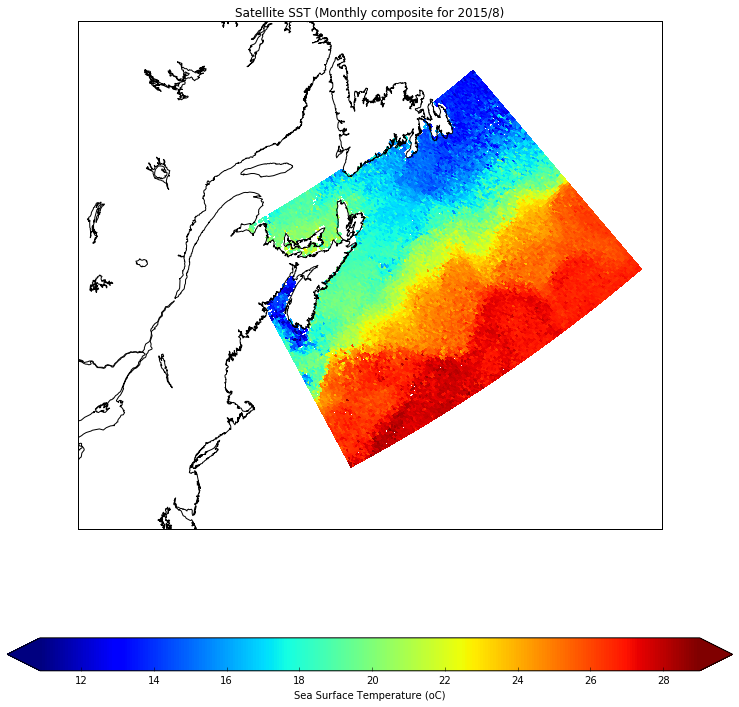

In [207]:
# Create map (Lamber Comformal Conic Projection)
m = Basemap(llcrnrlon=-80.5,llcrnrlat=40.,urcrnrlon=-40.566,urcrnrlat=44.352,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='i',area_thresh=1000.,projection='lcc',\
            lat_1=45.,lon_0=-107.)
fig1 = plt.figure(figsize=(13,13))
cs = m.pcolormesh(lons,lats,sst,cmap=plt.cm.jet,latlon=True)
m.drawcoastlines()
m.drawmapboundary()
plt.title('Satellite SST (Monthly composite for '+str(year)+'/'+str(month)+')')
cbar = plt.colorbar(orientation='horizontal', extend='both')
cbar.ax.set_xlabel('Sea Surface Temperature (oC)')

This is how you save your figure:

In [208]:
fig1.savefig('myplot.png')

# Time-series of SST

Rather than a map (snapshopt in time), lets import a time-series of a single spot

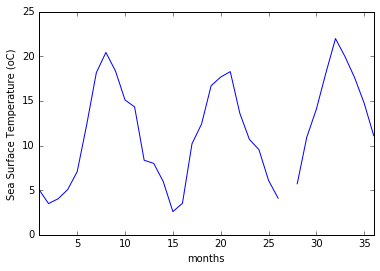

In [209]:
import pandas as pd

minday='2010-01-01T12:00:00Z'
maxday='2012-12-31T12:00:00Z'
lat = 43
lon = -62
isub = 1

base_url='http://coastwatch.pfeg.noaa.gov/erddap/griddap/erdAGsstamday_LonPM180.csv?'
query='sst[('+minday+'):'+str(isub)+':('+maxday+')][(0.0):'+str(isub)+':(0.0)][('+str(lat)+'):'+str(isub)+':('+str(lat)+')][('+str(lon)+'):'+str(isub)+':('+str(lon)+')]'
url = base_url+query
print "Downloading Satellite Data from: POES, AVHRR and GAC (Time-series)..."

data = pd.read_csv(url)
sst = data['sst'][1:].astype(float)
ax = sst.plot()
ax.set_xlabel('months')
ax.set_ylabel('Sea Surface Temperature (oC)')

The next part is tricky to explain... it re-shapes the original time-series to make it of the same size of the model output (you need to state "days" and "dt")... and it also "patches" any missing data. It is all done using interpolation and extrapolation. 

In [210]:
# Resize array and Eliminate Gaps by Interpolating in between
import scipy.interpolate as intrp
import numpy as np

months = len(sst)

x = np.arange(0, months)

f = intrp.interp1d(x, sst, kind='linear', fill_value='extrapolate' )

days = 365 * 3
dt = 0.01
NoSTEPS = int(days / dt)
newx = np.linspace(0,days/30,NoSTEPS) # Makes and vector array of equally spaced numbers from zero to "days"

new_sst = f(newx)

# Get rid of nans
nans, x= np.isnan(new_sst), lambda z: z.nonzero()[0]
new_sst[nans]= np.interp(x(nans), x(~nans), new_sst[~nans])

Take a look inside `new_sst`

In [211]:
new_sst

array([ 5.0750003 ,  5.07448249,  5.07396467, ...,  7.46905506,
        7.46786053,  7.466666  ])

What is the shape of `new_sst`?

In [212]:
new_sst.shape

(109500,)

Lets do a quick plot:

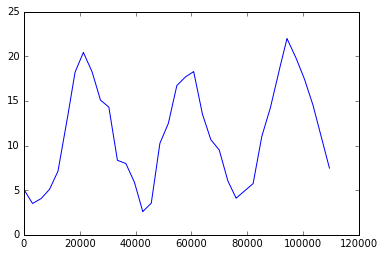

In [213]:
import matplotlib.pyplot as plt
fig, (ax) = plt.subplots(1,1)
ax.plot(new_sst,'b-')

# Focing MUSSEL model with SST

Make sure `model_Mussel_IbarraEtal2014` is in your working directory.

Model run: DONE!!!


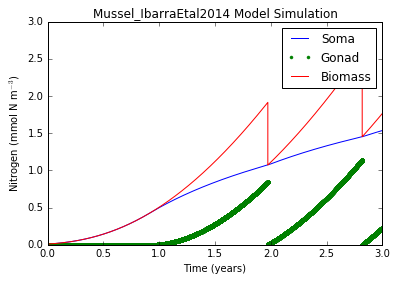

In [214]:
import model_Mussel_IbarraEtal2014 as MusselModel

days, dt, par, InitCond = MusselModel.load_defaults()
output = MusselModel.run_model(days,dt,InitCond,par)
MusselModel.plot_model(output)

Now... open `model_Mussel_IbarraEtal2014.py` in spyder and save it with a different name (e.g. `model_Mussel_IbarraEtal2014_SST.py`

Then do the next 3 minor changes:

(1) Indicate `sst` as input

Line 65 BEFORE: def run_model(days,dt,InitCond,par):

 Line 65 AFTER: def run_model(days,dt,InitCond,par,sst):

(2) Initialize `Temp` with `sst`

Line 107 BEFORE: Temp = InitCond['Temp']

 Line 107 AFTER: Temp = sst

(3) Make `Temp` as function of time: `Temp[t]`

Line 122 and 122 BEFORE:
```
        L_Temp[t] = min(max(0.,1.-np.exp(-par['KTempL']*(Temp-par['TempL']))), \
                     max(0.,1.+((1.-np.exp(par['KTempH']*Temp))/(np.exp(par['KTempH']*par['TempH'])-1.))))
```

Line 122 and 122 AFTER:
```
        L_Temp[t] = min(max(0.,1.-np.exp(-par['KTempL']*(Temp[t]-par['TempL']))), \
                     max(0.,1.+((1.-np.exp(par['KTempH']*Temp[t]))/(np.exp(par['KTempH']*par['TempH'])-1.))))

Lets run `model_Mussel_IbarraEtal2014_SST` using our downloaded satellite sst

Model run: DONE!!!


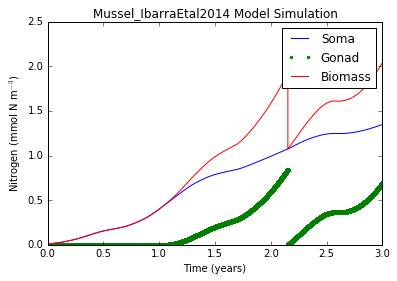

In [215]:
import model_Mussel_IbarraEtal2014_SST as MusselModel
reload(MusselModel)

days, dt, par, InitCond = MusselModel.load_defaults()
output = MusselModel.run_model(days,dt,InitCond,par,new_sst)
MusselModel.plot_model(output)

What are the differences between the model forced with SST and the one without forcing?

# Forcing with Oxygen Climatology

Here we need to go to the ERDDAP to download climatologies from the World Ocean Atlas 2009: https://coastwatch.pfeg.noaa.gov/erddap/griddap/nodcWoa09mon1t_LonPM180.html

Here we'll download all data for a single spot (like sst above)

Using the sliders, select all dates for latitude = 43.5 and longitude = -61.5

* Select only:  temperature_an, salinity_an and disOxygen_an
* File type: .csv
* Click on "Generate URL"

Below is how you use the url to get data (using pandas)

In [216]:
import pandas as pd

url = 'https://coastwatch.pfeg.noaa.gov/erddap/griddap/nodcWoa09mon1t_LonPM180.csv?temperature_an[(0000-01-16):1:(0000-12-16T00:00:00Z)][(0.0):1:(0)][(43.5):1:(43.5)][(-61.5):1:(-61.5)],salinity_an[(0000-01-16):1:(0000-12-16T00:00:00Z)][(0.0):1:(0)][(43.5):1:(43.5)][(-61.5):1:(-61.5)],disOxygen_an[(0000-01-16):1:(0000-12-16T00:00:00Z)][(0.0):1:(0)][(43.5):1:(43.5)][(-61.5):1:(-61.5)]'

data = pd.read_csv(url)

What type of object is `data`?

In [217]:
type(data)

pandas.core.frame.DataFrame

Take a look into data

In [218]:
data


,time,depth,latitude,longitude,temperature_an,salinity_an,disOxygen_an
0,UTC,m,degrees_north,degrees_east,degree_C,PSS-78,ml/l
1,0000-01-16T00:00:00Z,0.0,43.5,-61.5,3.6974,32.007,7.112
2,0000-02-16T00:00:00Z,0.0,43.5,-61.5,2.5313,32.0782,7.5488
3,0000-03-16T00:00:00Z,0.0,43.5,-61.5,2.2075,32.137,8.1066
4,0000-04-16T00:00:00Z,0.0,43.5,-61.5,3.1924,32.2826,7.6976
5,0000-05-16T00:00:00Z,0.0,43.5,-61.5,5.7885,32.1397,7.5281
6,0000-06-16T00:00:00Z,0.0,43.5,-61.5,9.6845,31.8438,6.8544
7,0000-07-16T00:00:00Z,0.0,43.5,-61.5,15.3419,31.4857,5.6874
8,0000-08-16T00:00:00Z,0.0,43.5,-61.5,18.2636,31.36,5.4629
9,0000-09-16T00:00:00Z,0.0,43.5,-61.5,17.3587,31.334,5.6072


What are the "keys" of data?

In [219]:
data.keys()

Index([u'time', u'depth', u'latitude', u'longitude', u'temperature_an',
       u'salinity_an', u'disOxygen_an'],
      dtype='object')

Take a look into `data['disOxygen_an']`

In [220]:
data['disOxygen_an']

0       ml/l
1      7.112
2     7.5488
3     8.1066
4     7.6976
5     7.5281
6     6.8544
7     5.6874
8     5.4629
9     5.6072
10    6.0201
11    6.1938
12    6.4053
Name: disOxygen_an, dtype: object

We only have 1 year of data, but we need a 3-year long time-series. So we'll copy-paste the same data 3 times to create a what we need. 

In [221]:
Oxy = data['disOxygen_an'][1:]
Oxy = Oxy.append(data['disOxygen_an'][1:])
Oxy = Oxy.append(data['disOxygen_an'][1:])

Take a look inside `Oxy`

In [222]:
Oxy

1      7.112
2     7.5488
3     8.1066
4     7.6976
5     7.5281
6     6.8544
7     5.6874
8     5.4629
9     5.6072
10    6.0201
11    6.1938
12    6.4053
1      7.112
2     7.5488
3     8.1066
4     7.6976
5     7.5281
6     6.8544
7     5.6874
8     5.4629
9     5.6072
10    6.0201
11    6.1938
12    6.4053
1      7.112
2     7.5488
3     8.1066
4     7.6976
5     7.5281
6     6.8544
7     5.6874
8     5.4629
9     5.6072
10    6.0201
11    6.1938
12    6.4053
Name: disOxygen_an, dtype: object

In [223]:
#Change pandas object to nparray
Oxy = Oxy.values

In [224]:
Oxy

array(['7.112', '7.5488', '8.1066', '7.6976', '7.5281', '6.8544', '5.6874',
       '5.4629', '5.6072', '6.0201', '6.1938', '6.4053', '7.112', '7.5488',
       '8.1066', '7.6976', '7.5281', '6.8544', '5.6874', '5.4629',
       '5.6072', '6.0201', '6.1938', '6.4053', '7.112', '7.5488', '8.1066',
       '7.6976', '7.5281', '6.8544', '5.6874', '5.4629', '5.6072',
       '6.0201', '6.1938', '6.4053'], dtype=object)

In [225]:
Oxy = Oxy.astype(float)

In [226]:
Oxy

array([ 7.112 ,  7.5488,  8.1066,  7.6976,  7.5281,  6.8544,  5.6874,
        5.4629,  5.6072,  6.0201,  6.1938,  6.4053,  7.112 ,  7.5488,
        8.1066,  7.6976,  7.5281,  6.8544,  5.6874,  5.4629,  5.6072,
        6.0201,  6.1938,  6.4053,  7.112 ,  7.5488,  8.1066,  7.6976,
        7.5281,  6.8544,  5.6874,  5.4629,  5.6072,  6.0201,  6.1938,
        6.4053])

In [227]:
# Resize array and Eliminate Gaps by Interpolating in between
import scipy.interpolate as intrp
import numpy as np

months = len(Oxy)

x = np.arange(0, months)

print len(x)

f = intrp.interp1d(x, Oxy, kind='linear', fill_value='extrapolate' )

days = 365 * 3
dt = 0.01
NoSTEPS = int(days / dt)
newx = np.linspace(0,days/30,NoSTEPS) # Makes and vector array of equally spaced numbers from zero to "days"

new_Oxy = f(newx)

# Get rid of nans
nans, x= np.isnan(new_Oxy), lambda z: z.nonzero()[0]
new_Oxy[nans]= np.interp(x(nans), x(~nans), new_Oxy[~nans])

36


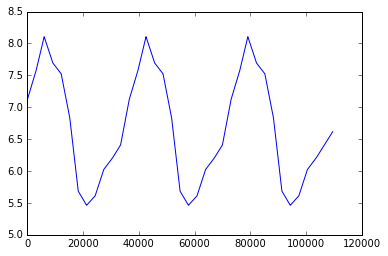

In [228]:
import matplotlib.pyplot as plt
fig, (ax) = plt.subplots(1,1)
ax.plot(new_Oxy,'b-')


In [229]:
new_Oxy.shape
new_Oxy

array([ 7.112     ,  7.11214361,  7.11228721, ...,  6.61666093,
        6.61673047,  6.6168    ])

In [230]:
# Oxy = Oxy.astype(float)

Model run: DONE!!!


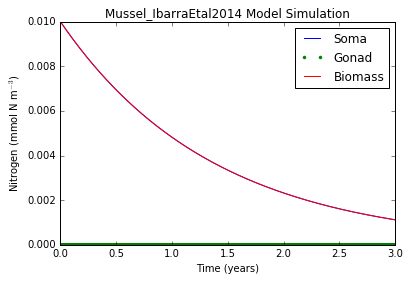

In [231]:
import model_Mussel_IbarraEtal2014_SST_Oxy as MusselModel
reload(MusselModel)

days, dt, par, InitCond = MusselModel.load_defaults()
output = MusselModel.run_model(days,dt,InitCond,par,new_sst,new_Oxy)
MusselModel.plot_model(output)

Model run: DONE!!!


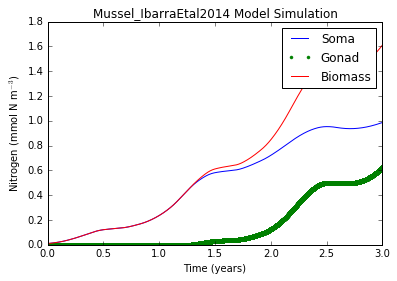

In [232]:

days, dt, par, InitCond = MusselModel.load_defaults()
par['OxyL']  = 2
par['KOxyL'] = 0.04
output = MusselModel.run_model(days,dt,InitCond,par,new_sst,new_Oxy)
MusselModel.plot_model(output)